In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

pd.set_option('display.max_colwidth', None)

get nlbse22 test data set

In [5]:
test = pd.read_csv('/Users/isdeniz/Documents/Documents_isdeniz/github/results-1707/nlbse22/nlbse22_dataset_nlbse22_preprocessing/test_clean_concat_200_detailed_data.csv')

In [6]:
test.shape

(80518, 7)

In [7]:
test.head()

,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels
0,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found",error keyerror key tiff.sampleformat_int 0x0008 not found,"One more error might need to be caught.\r\n`4D-series.ome.tif` is sample file from [OME-TIFF website]( https://docs.openmicroscopy.org/ome-model/6.0.0/ome-tiff/data.html).\r\n\r\n```julia\r\njulia> TIFF.load(""4D-series.ome.tif"")\r\nERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found\r\nStacktrace:\r\n [1] getindex(::Dict{Tuple{TIFF.SampleFormats,Int64},DataType}, ::Tuple{TIFF.SampleFormats,UInt16}) at ./dict.jl:477\r\n [2] output(::TIFF.IFD{UInt32}) at /home/hf/.julia/dev/TIFF/src/ifds.jl:113\r\n [3] load(::String) at /home/hf/.julia/dev/TIFF/src/load.jl:14\r\n [4] top-level scope at REPL[2]:1\r\n```\r\n",one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,time 2020-04-07T09:08:50Z author NONE repo tlnagy/TIFF.jl title error keyerror key tiff.sampleformat_int 0x0008 not found body one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,enhancement,1
1,Add database backup to dropbox,add database backup to dropbox,NaN,NaN,time 2020-11-27T07:17:21Z author OWNER repo tisboyo/Twitch_Bot title add database backup to dropbox body nan,enhancement,1
2,Add a button/method to open the Source or Output folders,add a button method to open the source or output folders,"Could also add a method to open up path to each file in the File list, by right-clicking.\r\nAlso an option to open up the path to the imgdanke.exe.",could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,time 2021-01-02T19:35:34Z author OWNER repo DrWhoCares/imgdanke title add a button method to open the source or output folders body could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,enhancement,1
3,Processes are being started twice,processes are being started twice,At some point I refactored a few things and ended up leaving in an additional call to `process.Start()` that should've just been replaced by the `using Process process = Process.Start()` call.,at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,time 2021-01-02T20:55:34Z author OWNER repo DrWhoCares/imgdanke title processes are being started twice body at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,bug,0
4,Cannot add hp to wall,cannot add hp to wall,NaN,NaN,time 2020-12-29T15:34:35Z author OWNER repo Bean-1/AOT title cannot add hp to wall body nan,bug,0


get predictions from the BERT model

In [8]:
predictions_bert = pd.read_pickle('/Users/isdeniz/Documents/Documents_isdeniz/github/results-1707/nlbse22/test_preds_nlbse22_paper.pkl')
print(predictions_bert.shape)

(80518, 4)


In [9]:
predictions_bert.head()

,text,labels,actual_labels,prediction
0,time 2020-04-07T09:08:50Z author NONE repo tlnagy/TIFF.jl title error keyerror key tiff.sampleformat_int 0x0008 not found body one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,1,1,0
1,time 2020-11-27T07:17:21Z author OWNER repo tisboyo/Twitch_Bot title add database backup to dropbox body nan,1,1,1
2,time 2021-01-02T19:35:34Z author OWNER repo DrWhoCares/imgdanke title add a button method to open the source or output folders body could also add a method to open up path to each file in the file list by right clicking. also an option to open up the path to the imgdanke.exe.,1,1,1
3,time 2021-01-02T20:55:34Z author OWNER repo DrWhoCares/imgdanke title processes are being started twice body at some point i refactored a few things and ended up leaving in an additional call to function that should've just been replaced by the using process process function call.,0,0,0
4,time 2020-12-29T15:34:35Z author OWNER repo Bean-1/AOT title cannot add hp to wall body nan,0,0,0


In [10]:
mapping = {0: 'bug', 1: 'enhancement', 2: 'question'}

In [11]:
predictions_bert['prediction'] = predictions_bert['prediction'].map(mapping)

In [12]:
predictions_bert['actual_labels'] = predictions_bert['actual_labels'].map(mapping)

In [13]:
actual_labels = predictions_bert['actual_labels']
predicted_labels = predictions_bert['prediction']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

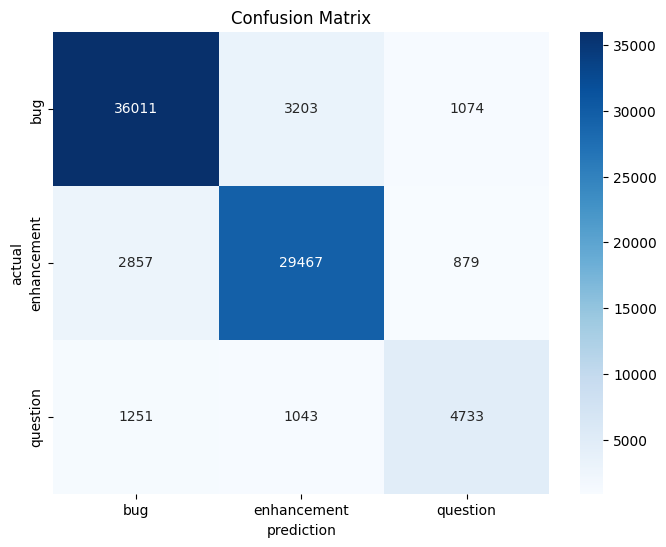

In [14]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.898     0.894     0.896     40288
 enhancement      0.874     0.887     0.881     33203
    question      0.708     0.674     0.690      7027

    accuracy                          0.872     80518
   macro avg      0.827     0.818     0.822     80518
weighted avg      0.871     0.872     0.872     80518



In [16]:
test['bert_prediction'] = predictions_bert['prediction']
test.tail()

original_issue_title  \
80513                         No Gap Fill with bucket size bigger then inserted interval of data   
80514                     desktop: Support sandbox with webkit_web_context_set_sandbox_enabled()   
80515                                                                     Can't install watchman   
80516  [Enhancement] Optional top section of Kirby page contents, visually blending with toolbar   
80517                                                   Script manage.sh wont work after install   

                                                                           preprocessed_title  \
80513                      no gap fill with bucket size bigger then inserted interval of data   
80514                     desktop support sandbox with webkit_web_context_set_sandbox_enabled   
80515                                                                  can't install watchman   
80516  enhancement optional top section of kirby page contents visually blending with toolbar   
80517                                                script manage.sh wont work after install   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

get predictions from the Llama3 8B model

In [17]:
predictions_8b = pd.read_pickle('/Users/isdeniz/Documents/Documents_isdeniz/github/results-1707/nlbse22_llama3_8b/test_preds_nlbse22_paper_llama3_8b_organized.pkl')
print(predictions_8b.shape)

(80518, 10)


In [18]:
predictions_8b.head()

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_8b_prediction,llama3_8b_prediction_organized
0,6,https://api.github.com/repos/tlnagy/TIFF.jl/issues/7,enhancement,2020-04-07T09:08:50Z,NONE,https://api.github.com/repos/tlnagy/TIFF.jl,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found","One more error might need to be caught.\r\n`4D-series.ome.tif` is sample file from [OME-TIFF website]( https://docs.openmicroscopy.org/ome-model/6.0.0/ome-tiff/data.html).\r\n\r\n```julia\r\njulia> TIFF.load(""4D-series.ome.tif"")\r\nERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found\r\nStacktrace:\r\n [1] getindex(::Dict{Tuple{TIFF.SampleFormats,Int64},DataType}, ::Tuple{TIFF.SampleFormats,UInt16}) at ./dict.jl:477\r\n [2] output(::TIFF.IFD{UInt32}) at /home/hf/.julia/dev/TIFF/src/ifds.jl:113\r\n [3] load(::String) at /home/hf/.julia/dev/TIFF/src/load.jl:14\r\n [4] top-level scope at REPL[2]:1\r\n```\r\n",Bug,bug
1,19,https://api.github.com/repos/tisboyo/Twitch_Bot/issues/57,enhancement,2020-11-27T07:17:21Z,OWNER,https://api.github.com/repos/tisboyo/Twitch_Bot,Add database backup to dropbox,NaN,Enhancement,enhancement
2,25,https://api.github.com/repos/DrWhoCares/imgdanke/issues/70,enhancement,2021-01-02T19:35:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Add a button/method to open the Source or Output folders,"Could also add a method to open up path to each file in the File list, by right-clicking.\r\nAlso an option to open up the path to the imgdanke.exe.",Enhancement,enhancement
3,30,https://api.github.com/repos/DrWhoCares/imgdanke/issues/72,bug,2021-01-02T20:55:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Processes are being started twice,At some point I refactored a few things and ended up leaving in an additional call to `process.Start()` that should've just been replaced by the `using Process process = Process.Start()` call.,Bug,bug
4,54,https://api.github.com/repos/Bean-1/AOT/issues/3,bug,2020-12-29T15:34:35Z,OWNER,https://api.github.com/repos/Bean-1/AOT,Cannot add hp to wall,NaN,Bug,bug


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
actual_labels = predictions_bert['actual_labels']
predicted_labels = predictions_8b['llama3_8b_prediction_organized']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

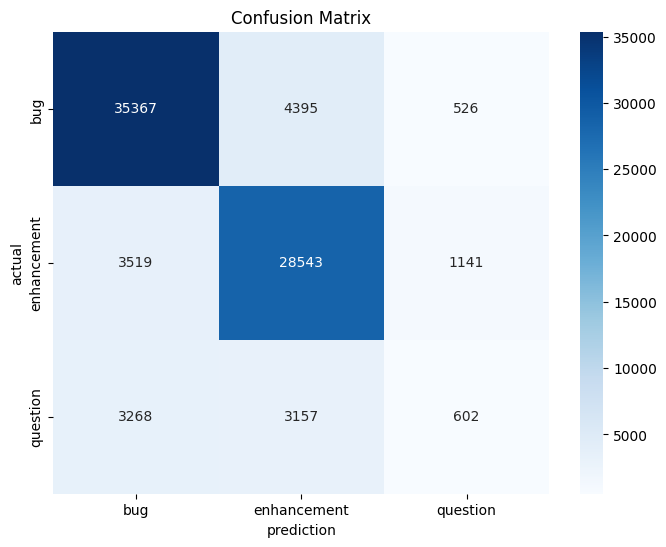

In [21]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.839     0.878     0.858     40288
 enhancement      0.791     0.860     0.824     33203
    question      0.265     0.086     0.130      7027

    accuracy                          0.801     80518
   macro avg      0.632     0.608     0.604     80518
weighted avg      0.769     0.801     0.780     80518



In [23]:
test['llama3_8b_prediction'] = predictions_8b['llama3_8b_prediction_organized']
test.tail()

original_issue_title  \
80513                         No Gap Fill with bucket size bigger then inserted interval of data   
80514                     desktop: Support sandbox with webkit_web_context_set_sandbox_enabled()   
80515                                                                     Can't install watchman   
80516  [Enhancement] Optional top section of Kirby page contents, visually blending with toolbar   
80517                                                   Script manage.sh wont work after install   

                                                                           preprocessed_title  \
80513                      no gap fill with bucket size bigger then inserted interval of data   
80514                     desktop support sandbox with webkit_web_context_set_sandbox_enabled   
80515                                                                  can't install watchman   
80516  enhancement optional top section of kirby page contents visually blending with toolbar   
80517                                                script manage.sh wont work after install   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

get predictions from the Llama3 70B model

In [24]:
predictions_70b = pd.read_pickle('/Users/isdeniz/Documents/Documents_isdeniz/github/results-1707/nlbse22_llama3_70b/test_preds_nlbse22_paper_llama3_70b_organized.pkl')
print(predictions_70b.shape)

(80518, 10)


In [25]:
predictions_70b.head()

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body,llama3_70b_prediction,llama3_70b_prediction_organized
0,6,https://api.github.com/repos/tlnagy/TIFF.jl/issues/7,enhancement,2020-04-07T09:08:50Z,NONE,https://api.github.com/repos/tlnagy/TIFF.jl,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found","One more error might need to be caught.\r\n`4D-series.ome.tif` is sample file from [OME-TIFF website]( https://docs.openmicroscopy.org/ome-model/6.0.0/ome-tiff/data.html).\r\n\r\n```julia\r\njulia> TIFF.load(""4D-series.ome.tif"")\r\nERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found\r\nStacktrace:\r\n [1] getindex(::Dict{Tuple{TIFF.SampleFormats,Int64},DataType}, ::Tuple{TIFF.SampleFormats,UInt16}) at ./dict.jl:477\r\n [2] output(::TIFF.IFD{UInt32}) at /home/hf/.julia/dev/TIFF/src/ifds.jl:113\r\n [3] load(::String) at /home/hf/.julia/dev/TIFF/src/load.jl:14\r\n [4] top-level scope at REPL[2]:1\r\n```\r\n",Bug,bug
1,19,https://api.github.com/repos/tisboyo/Twitch_Bot/issues/57,enhancement,2020-11-27T07:17:21Z,OWNER,https://api.github.com/repos/tisboyo/Twitch_Bot,Add database backup to dropbox,NaN,Enhancement,enhancement
2,25,https://api.github.com/repos/DrWhoCares/imgdanke/issues/70,enhancement,2021-01-02T19:35:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Add a button/method to open the Source or Output folders,"Could also add a method to open up path to each file in the File list, by right-clicking.\r\nAlso an option to open up the path to the imgdanke.exe.",Enhancement,enhancement
3,30,https://api.github.com/repos/DrWhoCares/imgdanke/issues/72,bug,2021-01-02T20:55:34Z,OWNER,https://api.github.com/repos/DrWhoCares/imgdanke,Processes are being started twice,At some point I refactored a few things and ended up leaving in an additional call to `process.Start()` that should've just been replaced by the `using Process process = Process.Start()` call.,Bug,bug
4,54,https://api.github.com/repos/Bean-1/AOT/issues/3,bug,2020-12-29T15:34:35Z,OWNER,https://api.github.com/repos/Bean-1/AOT,Cannot add hp to wall,NaN,Bug,bug


In [26]:
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
actual_labels = predictions_bert['actual_labels']
predicted_labels = predictions_70b['llama3_70b_prediction_organized']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

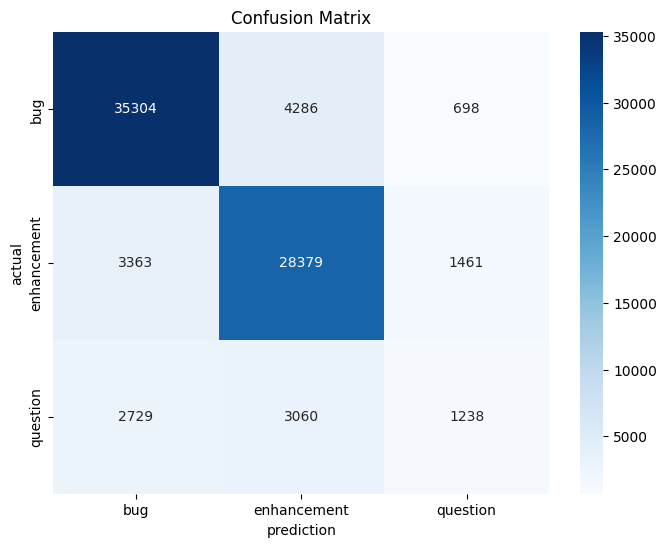

In [28]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.853     0.876     0.864     40288
 enhancement      0.794     0.855     0.823     33203
    question      0.364     0.176     0.238      7027

    accuracy                          0.806     80518
   macro avg      0.671     0.636     0.642     80518
weighted avg      0.786     0.806     0.793     80518



In [30]:
test['llama3_70b_prediction'] = predictions_70b['llama3_70b_prediction_organized']
test.tail()

original_issue_title  \
80513                         No Gap Fill with bucket size bigger then inserted interval of data   
80514                     desktop: Support sandbox with webkit_web_context_set_sandbox_enabled()   
80515                                                                     Can't install watchman   
80516  [Enhancement] Optional top section of Kirby page contents, visually blending with toolbar   
80517                                                   Script manage.sh wont work after install   

                                                                           preprocessed_title  \
80513                      no gap fill with bucket size bigger then inserted interval of data   
80514                     desktop support sandbox with webkit_web_context_set_sandbox_enabled   
80515                                                                  can't install watchman   
80516  enhancement optional top section of kirby page contents visually blending with toolbar   
80517                                                script manage.sh wont work after install   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

organize check columns

In [31]:
test.columns

Index(['original_issue_title', 'preprocessed_title', 'original_issue_body',
       'preprocessed_body', 'text', 'issue_label', 'labels', 'bert_prediction',
       'llama3_8b_prediction', 'llama3_70b_prediction'],
      dtype='object')

In [32]:
test['bert_check'] = test['issue_label'] == test['bert_prediction']
test['bert_check'].value_counts()

bert_check
True     70211
False    10307
Name: count, dtype: int64

In [33]:
test['llama3_8b_check'] = test['issue_label'] == test['llama3_8b_prediction']
test['llama3_8b_check'].value_counts()

llama3_8b_check
True     64512
False    16006
Name: count, dtype: int64

In [34]:
test['llama3_70b_check'] = test['issue_label'] == test['llama3_70b_prediction']
test['llama3_70b_check'].value_counts()

llama3_70b_check
True     64921
False    15597
Name: count, dtype: int64

In [35]:
test.to_csv('nlbse22_test_results.csv')
test.to_pickle('nlbse22_test_results.pkl')

In [36]:
false_test_results = test[ 
    (
        (test['bert_check'] != True) | 
        (test['llama3_8b_check'] != True) | 
        (test['llama3_70b_check'] != True)
    )
    & ~((test['bert_check'] == True) & (test['llama3_8b_check'] == True) & (test['llama3_70b_check'] == True))
]
false_test_results = false_test_results.reset_index(drop = True)
print(false_test_results.shape)
false_test_results.to_csv('nlbse22_false_test_results.csv')
false_test_results.to_pickle('nlbse22_false_test_results.pkl')

(22019, 13)


In [40]:
test[test['bert_check'] != True].shape[0]

10307

In [38]:
test[(test['bert_check'] != True) & (test['llama3_8b_check'] != True)].shape[0]

6451

In [39]:
test[(test['bert_check'] != True) & (test['llama3_70b_check'] != True)].shape[0]

6400

In [41]:
test[test['llama3_8b_check'] != True].shape[0]

16006

In [43]:
test[(test['llama3_8b_check'] != True) & (test['llama3_70b_check'] != True)].shape[0]

12774

In [44]:
test[test['llama3_70b_check'] != True].shape[0]

15597

In [47]:
test[test['bert_check'] != True]['issue_label'].value_counts()

issue_label
bug            4277
enhancement    3736
question       2294
Name: count, dtype: int64

In [48]:
test[(test['bert_check'] != True) & (test['llama3_8b_check'] != True)]['issue_label'].value_counts()

issue_label
bug            2243
question       2214
enhancement    1994
Name: count, dtype: int64

In [49]:
test[(test['bert_check'] != True) & (test['llama3_70b_check'] != True)]['issue_label'].value_counts()

issue_label
bug            2345
question       2125
enhancement    1930
Name: count, dtype: int64

In [50]:
test[test['llama3_8b_check'] != True]['issue_label'].value_counts()

issue_label
question       6425
bug            4921
enhancement    4660
Name: count, dtype: int64

In [51]:
test[(test['llama3_8b_check'] != True) & (test['llama3_70b_check'] != True)]['issue_label'].value_counts()

issue_label
question       5621
bug            3777
enhancement    3376
Name: count, dtype: int64

In [60]:
test[test['llama3_70b_check'] != True]['issue_label'].value_counts()

issue_label
question       5789
bug            4984
enhancement    4824
Name: count, dtype: int64

In [69]:
false_test_results.head()

,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,text,issue_label,labels,bert_prediction,llama3_8b_prediction,llama3_70b_prediction,bert_check,llama3_8b_check,llama3_70b_check
0,"ERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found",error keyerror key tiff.sampleformat_int 0x0008 not found,"One more error might need to be caught.\r\n`4D-series.ome.tif` is sample file from [OME-TIFF website]( https://docs.openmicroscopy.org/ome-model/6.0.0/ome-tiff/data.html).\r\n\r\n```julia\r\njulia> TIFF.load(""4D-series.ome.tif"")\r\nERROR: KeyError: key (TIFF.SAMPLEFORMAT_INT, 0x0008) not found\r\nStacktrace:\r\n [1] getindex(::Dict{Tuple{TIFF.SampleFormats,Int64},DataType}, ::Tuple{TIFF.SampleFormats,UInt16}) at ./dict.jl:477\r\n [2] output(::TIFF.IFD{UInt32}) at /home/hf/.julia/dev/TIFF/src/ifds.jl:113\r\n [3] load(::String) at /home/hf/.julia/dev/TIFF/src/load.jl:14\r\n [4] top-level scope at REPL[2]:1\r\n```\r\n",one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,time 2020-04-07T09:08:50Z author NONE repo tlnagy/TIFF.jl title error keyerror key tiff.sampleformat_int 0x0008 not found body one more error might need to be caught. 4d series.ome.tif is sample file from ome tiff website https docs.openmicroscopy.org ome model 6.0.0 ome tiff data.html . julia julia tiff.load 4d series.ome.tif error keyerror key tiff.sampleformat_int 0x0008 not found stacktrace 1 getindex dict tuple tiff.sampleformats int64 datatype tuple tiff.sampleformats uint16 at . dict.jl 477 2 output tiff.ifd uint32 at home hf .julia dev tiff src ifds.jl 113 3 load string at home hf .julia dev tiff src load.jl 14 4 top level scope at repl 2 1,enhancement,1,bug,bug,bug,False,False,False
1,Property starts with $ can not be auto completed,property starts with can not be auto completed,"``` javascript\nclass Scope {\n $$watchers: Watcher[] = [];\n $on(eventName: string, listener: ScopeEventListener): AnyFunction {\n this. // can not autocomplete $$watcher \n }\n}\n\nconst scope = new Scope();\nscope.$o // can not autocomplete $on\n```\n\nThere is an option `munge_underscores` in the [doc](https://flowtype.org/docs/advanced-configuration.html#options). But I didn't find doc saying property starts with `$` is not allowed.\n",javascript class scope watchers watcher on eventname string listener scopeeventlistener anyfunction this. can not autocomplete watcher const scope new function scope. o can not autocomplete on there is an option munge_underscores in the doc https flowtype.org docs advanced configuration.html options . but i didn't find doc saying property starts with is not allowed.,time 2016-06-18T09:14:04Z author NONE repo facebook/flow title property starts with can not be auto completed body javascript class scope watchers watcher on eventname string listener scopeeventlistener anyfunction this. can not autocomplete watcher const scope new function scope. o can not autocomplete on there is an option munge_underscores in the doc https flowtype.org docs advanced configuration.html options . but i didn't find doc saying property starts with is not allowed.,bug,0,bug,bug,enhancement,True,True,False
2,Fix RTOS compiler warnings,fix rtos compiler warnings,There are a bunch of compiler warnings on the rtos branch,there are a bunch of compiler warnings on the rtos branch,time 2020-11-21T19:07:48Z author MEMBER repo lhr-solar/BPS title fix rtos compiler warnings body there are a bunch of compiler warnings on the rtos branch,bug,0,bug,bug,enhancement,True,True,False
3,"